<a href="https://colab.research.google.com/github/hominiikkurthi-hue/gittutorials/blob/main/Maternal_Health_Risk_Classification1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
data = pd.read_csv('datasetmentalhealth.csv')
data.head(10)

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.00,98.0,86,high risk
1,35,140,90,13.00,98.0,70,high risk
2,29,90,70,8.00,100.0,80,high risk
3,30,140,85,7.00,98.0,70,high risk
4,35,120,60,6.10,98.0,76,low risk
5,23,140,80,7.01,98.0,70,high risk
6,23,130,70,7.01,98.0,78,mid risk
7,35,85,60,11.00,102.0,86,high risk
8,32,120,90,6.90,98.0,70,mid risk
9,42,130,80,18.00,98.0,70,high risk


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


In [9]:
data.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


# Checking the dataset distribution

In [10]:
data['RiskLevel'].unique()

array(['high risk', 'low risk', 'mid risk'], dtype=object)

In [11]:
data['RiskLevel'].value_counts()/len(data)

,count
RiskLevel,
low risk,0.400394
mid risk,0.331361
high risk,0.268245


<Axes: ylabel='count'>

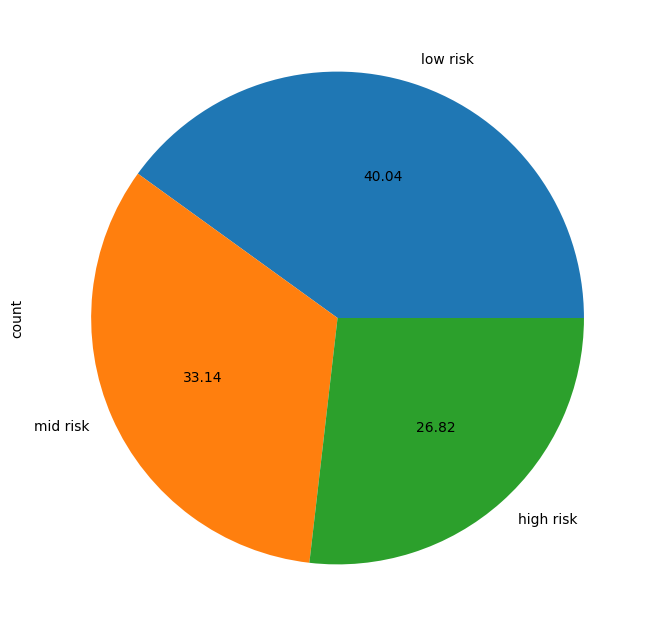

In [12]:
data['RiskLevel'].value_counts().plot.pie(autopct='%.2f',figsize=(8,8))

# Seperating dependent and independent variable

In [13]:
X=data.drop(columns=['RiskLevel'])
Y=data['RiskLevel']

In [14]:
X.shape

(1014, 6)

In [15]:
Y.shape

(1014,)

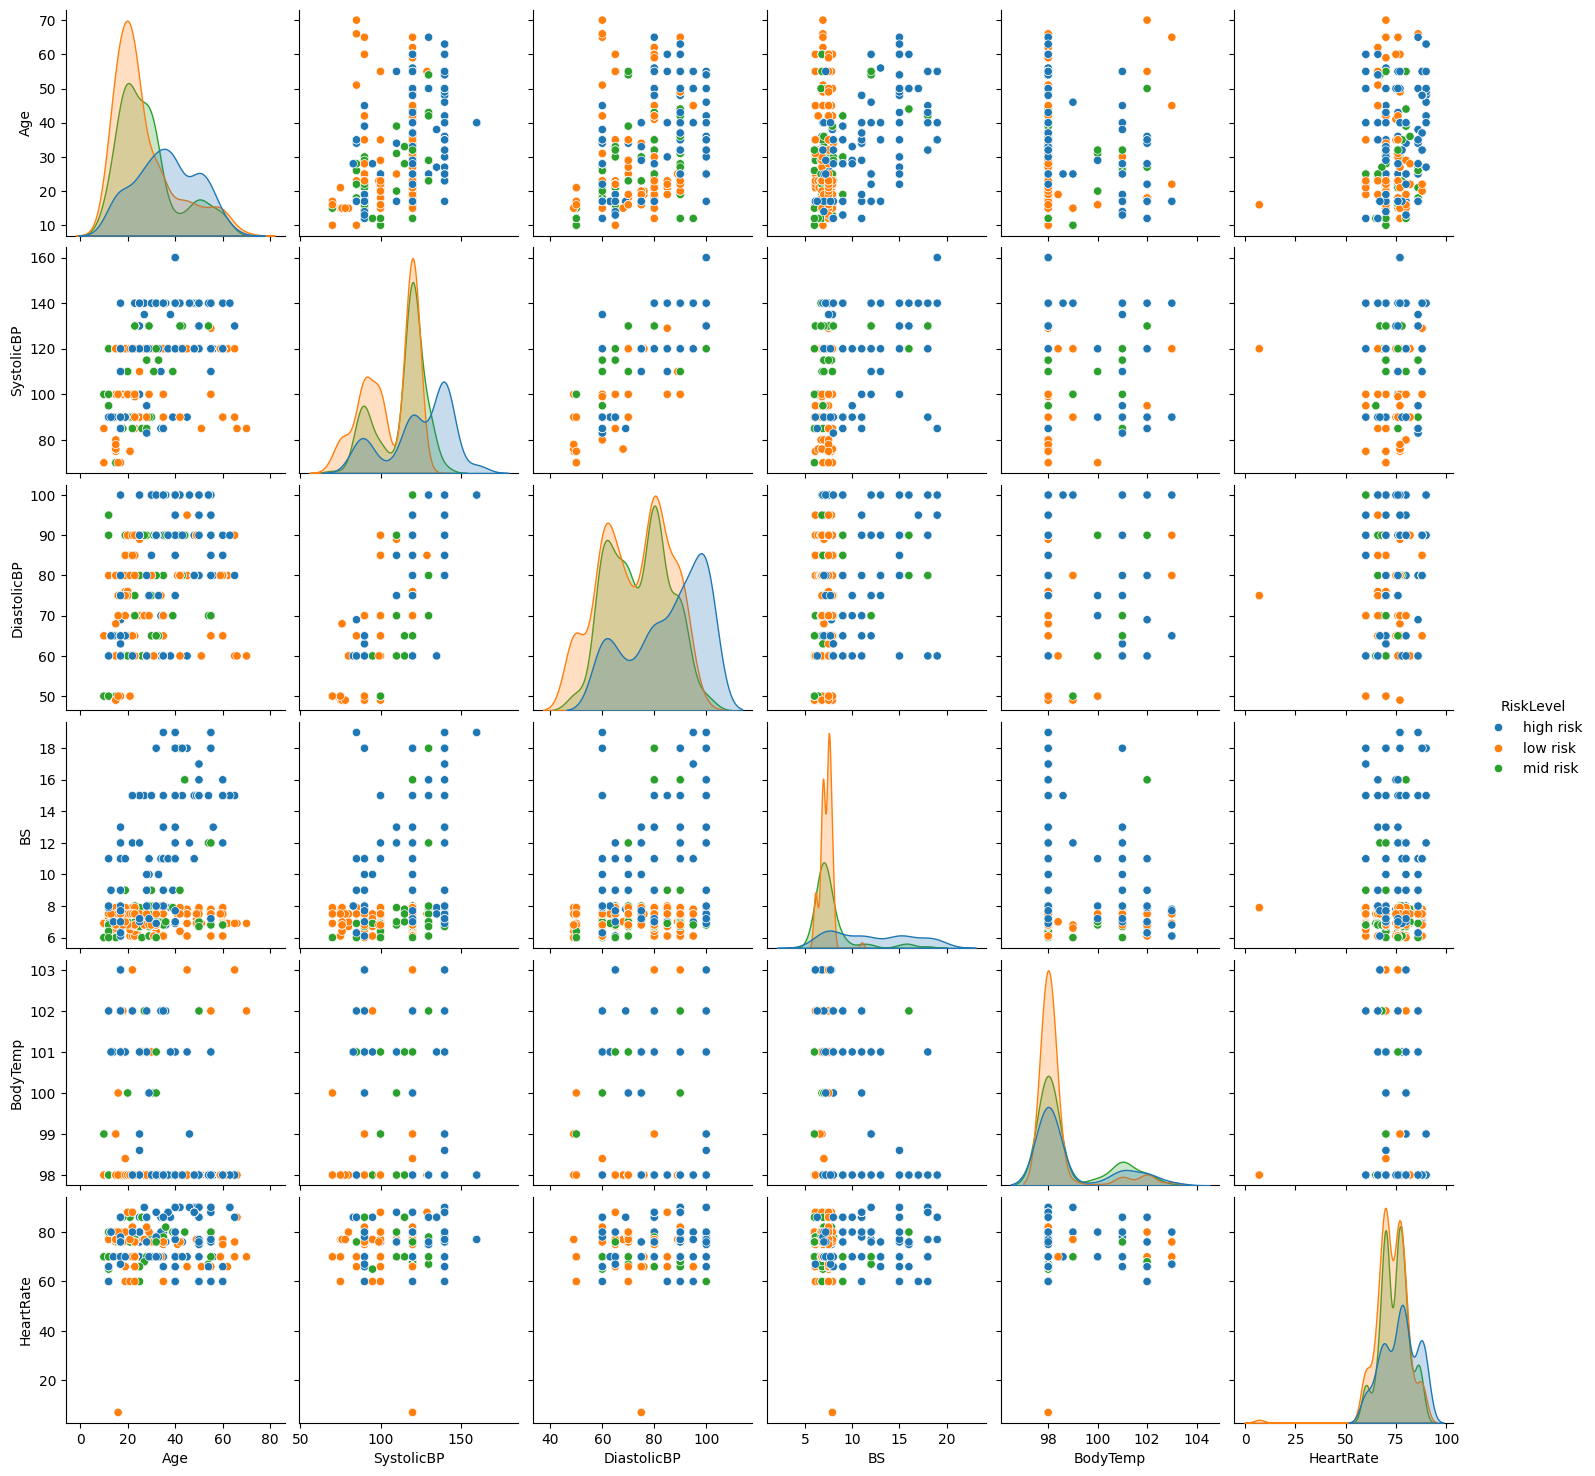

In [16]:
sns.pairplot(data,hue='RiskLevel')

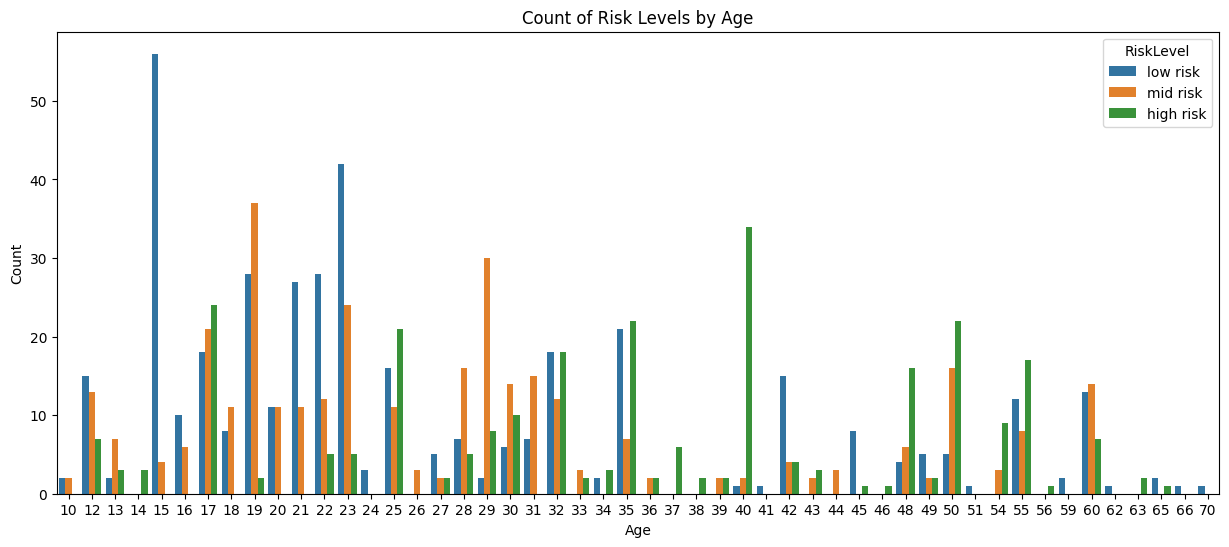

In [17]:

plt.figure(figsize=(15,6))
sns.countplot(x='Age', hue='RiskLevel', data=data)
plt.title('Count of Risk Levels by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [18]:
# correlation =data.corr()
# plt.figure(figsize=(12,8))
# sns.heatmap(correlation,xticklabels=correlation.columns,yticklabels=correlation.columns,annot =True)

In [19]:
# sns.scatterplot('DiastolicBP','SystolicBP',hue='RiskLevel',data=data)

In [20]:
# sns.scatterplot('RiskLevel','BS',hue='RiskLevel',data=data)

In [21]:
# sns.scatterplot('Age','BS',hue='RiskLevel',data=data)

In [22]:
# sns.catplot(x="RiskLevel", y="SystolicBP", data=data, kind="box").set(title="Distribution based on SystolicBP")
# sns.catplot(x="RiskLevel", y="DiastolicBP", data=data, kind="box").set(title="Distribution based on DiastolicBP")

# Scaling the dataset

In [23]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_X=scaler.fit_transform(X)

# Splitting the dataset

In [24]:
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test=tts(scaled_X,Y,train_size=0.70,stratify=Y,random_state=101)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((709, 6), (305, 6), (709,), (305,))

In [25]:
x_train.size

4254

In [26]:
x_test.size

1830

# Model Building, predictions and odds ratio

# Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression as LR
classifier=LR(class_weight='balanced')
classifier.fit(x_train,y_train)
predicted_values=classifier.predict(x_test)
predicted_probabilities=classifier.predict_proba(x_test)
predicted_values
predicted_probabilities,predicted_probabilities.shape

(array([[1.08770229e-01, 4.38092336e-01, 4.53137436e-01],
        [3.67335631e-01, 2.25047331e-01, 4.07617038e-01],
        [3.52013526e-02, 6.71761409e-01, 2.93037239e-01],
        [1.24795004e-01, 2.69708945e-01, 6.05496051e-01],
        [7.50977162e-02, 6.06852471e-01, 3.18049812e-01],
        [1.70228400e-01, 1.89875424e-01, 6.39896176e-01],
        [7.01495263e-02, 5.63918579e-01, 3.65931894e-01],
        [3.54390712e-02, 4.16537002e-01, 5.48023927e-01],
        [6.90734039e-01, 4.03307998e-02, 2.68935162e-01],
        [5.64654497e-01, 7.21446224e-02, 3.63200880e-01],
        [4.38362108e-01, 1.75989616e-01, 3.85648277e-01],
        [3.43283948e-01, 2.00799982e-01, 4.55916070e-01],
        [2.39028735e-02, 7.09876209e-01, 2.66220918e-01],
        [9.66203872e-02, 4.26925721e-01, 4.76453892e-01],
        [1.15178037e-01, 4.31269658e-01, 4.53552305e-01],
        [1.90160540e-02, 7.66675626e-01, 2.14308320e-01],
        [3.74714324e-02, 4.08489452e-01, 5.54039115e-01],
        [9.491

In [28]:
y_train.shape

(709,)

In [29]:
predicted_values.shape

(305,)

In [30]:
y_test.shape

(305,)

1. Confusion matrix(Logistic Regression)

In [31]:
from sklearn.metrics import confusion_matrix
cf=confusion_matrix(y_test,predicted_values)
cf

array([[60,  5, 17],
       [ 6, 86, 30],
       [23, 37, 41]])

1(a)Accuracy matrix

In [32]:
classifier.score(x_test,y_test)

0.6131147540983607

1(b)Calculating the precision score

In [33]:
from sklearn.metrics import precision_recall_fscore_support as PRF_summary
precision,recall,f1,support=PRF_summary(y_test,predicted_values)

In [34]:
precision

array([0.6741573 , 0.671875  , 0.46590909])

In [35]:
recall

array([0.73170732, 0.70491803, 0.40594059])

In [36]:
f1

array([0.70175439, 0.688     , 0.43386243])

In [37]:
support

array([ 82, 122, 101])

<Axes: >

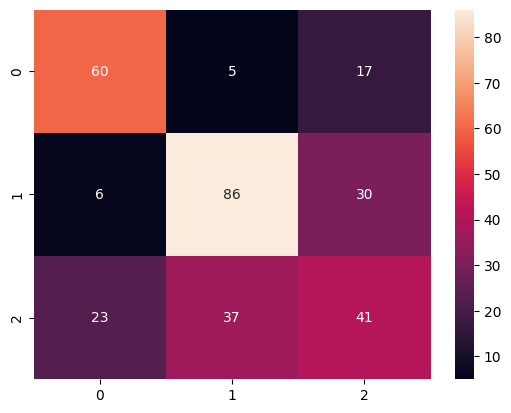

In [38]:
sns.heatmap(confusion_matrix(y_test,predicted_values),annot=True)

In [39]:
from sklearn.metrics import classification_report
k=classification_report(y_test,predicted_values)
print(k)

              precision    recall  f1-score   support

   high risk       0.67      0.73      0.70        82
    low risk       0.67      0.70      0.69       122
    mid risk       0.47      0.41      0.43       101

    accuracy                           0.61       305
   macro avg       0.60      0.61      0.61       305
weighted avg       0.60      0.61      0.61       305



# Decision Tree

In [40]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [41]:
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [42]:
pred= model.predict(x_test)

<Axes: >

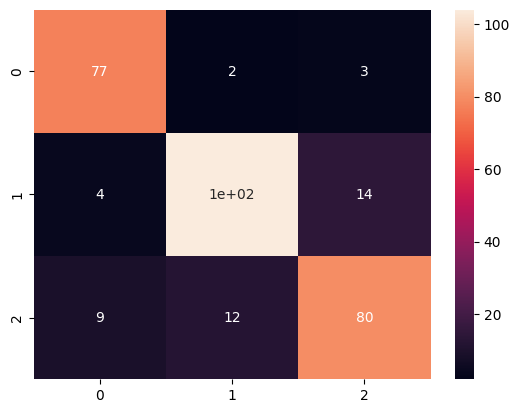

In [43]:
sns.heatmap(confusion_matrix(y_test,pred),annot=True)

In [44]:
model.score(x_test,y_test)

0.8557377049180328

In [45]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

   high risk       0.86      0.94      0.90        82
    low risk       0.88      0.85      0.87       122
    mid risk       0.82      0.79      0.81       101

    accuracy                           0.86       305
   macro avg       0.85      0.86      0.86       305
weighted avg       0.86      0.86      0.85       305



In [46]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
x_train= scale.fit_transform(x_train)
x_test= scale.transform(x_test)

In [47]:
x_train

array([[-0.34096191,  0.34432827,  0.9405713 , -0.62741662,  1.73365201,
         0.75085067],
       [ 0.7672685 ,  2.58609821,  1.67573286,  3.08934025, -0.47759639,
         0.38763498],
       [-0.63649001, -1.33699918, -2.00007494, -0.56698155, -0.47759639,
        -1.67058725],
       ...,
       [-0.93201812, -1.33699918, -1.04436491, -0.56698155,  1.73365201,
        -0.45986829],
       [-1.07978217, -2.12161866, -2.0735911 , -0.71806923, -0.47759639,
         0.38763498],
       [-0.63649001, -1.33699918, -0.8973326 , -0.38567634, -0.47759639,
         0.26656309]])

In [48]:
modelDTC= DecisionTreeClassifier(criterion='gini', random_state=101)
modelDTC.fit(x_train, y_train)

DecisionTreeClassifier(random_state=101)

In [49]:
y_pred= modelDTC.predict(x_test)

In [50]:
# from sklearn.metrics import plot_confusion_matrix

In [51]:
# plot_confusion_matrix(modelDTC,x_test,y_test)

In [52]:
# modelDTC.score(x_test,y_test)

In [53]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

   high risk       0.85      0.93      0.89        82
    low risk       0.88      0.86      0.87       122
    mid risk       0.82      0.79      0.81       101

    accuracy                           0.86       305
   macro avg       0.85      0.86      0.86       305
weighted avg       0.86      0.86      0.86       305



# Random Forest

In [54]:
from sklearn.ensemble import RandomForestClassifier

In [55]:
RF= RandomForestClassifier(criterion='gini')
RF.fit(x_train,y_train)

RandomForestClassifier()

In [56]:
predict=RF.predict(x_test)

In [57]:
# plot_confusion_matrix(RF,x_test,y_test)

In [58]:
RF.score(x_test,y_test)

0.8721311475409836

In [59]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

   high risk       0.87      0.93      0.90        82
    low risk       0.90      0.87      0.88       122
    mid risk       0.84      0.83      0.84       101

    accuracy                           0.87       305
   macro avg       0.87      0.88      0.87       305
weighted avg       0.87      0.87      0.87       305



# Support Vector

In [60]:
from sklearn.svm import SVC

In [61]:
svc= SVC(kernel='poly')
svc.fit(x_train,y_train)

SVC(kernel='poly')

In [62]:
svc_pred=svc.predict(x_test)

In [63]:
print(classification_report(y_test,svc_pred))

              precision    recall  f1-score   support

   high risk       0.84      0.78      0.81        82
    low risk       0.61      0.92      0.73       122
    mid risk       0.66      0.29      0.40       101

    accuracy                           0.67       305
   macro avg       0.70      0.66      0.65       305
weighted avg       0.69      0.67      0.64       305



In [64]:
svc.score(x_test,y_test)

0.6721311475409836